In [1]:
#libraries
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer



df = pd.read_csv('C:/ML/python/data/data.csv',delimiter=',')

df.info()
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df['Sentiment'].value_counts()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


neutral     3124
positive    1852
negative     860
Name: Sentiment, dtype: int64

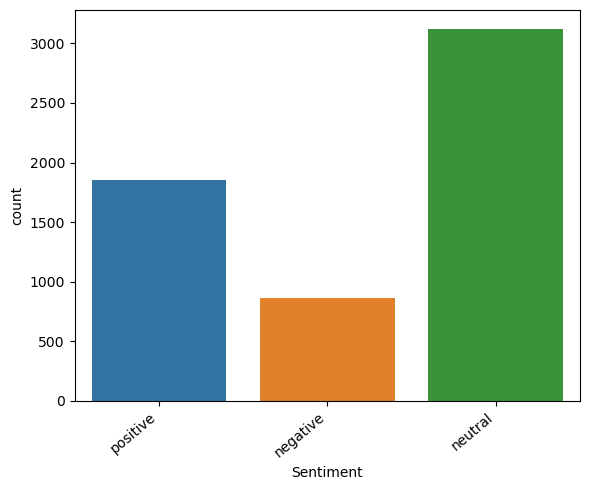

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [2]:
df['class'] = df['Sentiment'].map({'negative':0,'positive':1,'neutral':2})


fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='Sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

df['Sentence'] = df['Sentence'].str.lower()
print(df['Sentence'])

In [3]:
#removing html tags

def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text

df['Sentence'] = df['Sentence'].apply(remove_html_tags)

print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [4]:
#removing url tags
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df['Sentence'] = df['Sentence'].apply(remove_url)

print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [5]:
#removing punctuations
import string
PUNC = string.punctuation


def remove_punctuations(text):
    return text.translate(str.maketrans("","",PUNC))

df['Sentence'] = df['Sentence'].apply(remove_punctuations)

print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       esi on lows down 150 to 250 bk a real possibility
2       for the last quarter of 2010  componenta s net...
3       according to the finnishrussian chamber of com...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line  the eu...
5840    in the building and home improvement trade  sa...
5841    helsinki afx  kci konecranes said it has won a...
Name: Sentence, Length: 5836, dtype: object


In [6]:
#removing misc and stopwords
df['Sentence'] = df['Sentence'].str.replace("\d","")
df['Sentence'] = df['Sentence'].str.replace("[^\w\s]","")
df['Sentence'] = df['Sentence'].str.replace("mn","")

sw = set(stopwords.words("english"))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return ' '.join(filtered_tokens)

df['Sentence'] = df['Sentence'].apply(remove_stopwords)


In [7]:
#applying lemmetization
#lemmatization
lemma = WordNetLemmatizer()

def lemm_text(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)

df['Sentence'] = df['Sentence'].apply(lemm_text)
print(df['Sentence'])


0       geosolutions technology leverage benefon gps s...
1                             esi low bk real possibility
2       last quarter componenta net sale doubled eurm ...
3       according finnishrussian chamber commerce majo...
4       swedish buyout firm sold remaining percent sta...
                              ...                        
5837    rising cost forced packaging producer huhtamak...
5838    nordic walking first used summer training meth...
5839    according shipping company viking line eu deci...
5840    building home improvement trade sale decreased...
5841    helsinki afx kci konecranes said order four ho...
Name: Sentence, Length: 5836, dtype: object


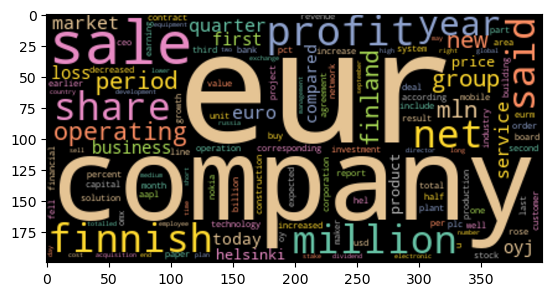

In [8]:
#wordcloud to visulize frequencies of each word
text_ = " ".join(word for word in df["Sentence"])



wordcloud = WordCloud(colormap='Set2',collocations=False).generate(text_)
plt.imshow(wordcloud,interpolation='mitchell')
plt.show()

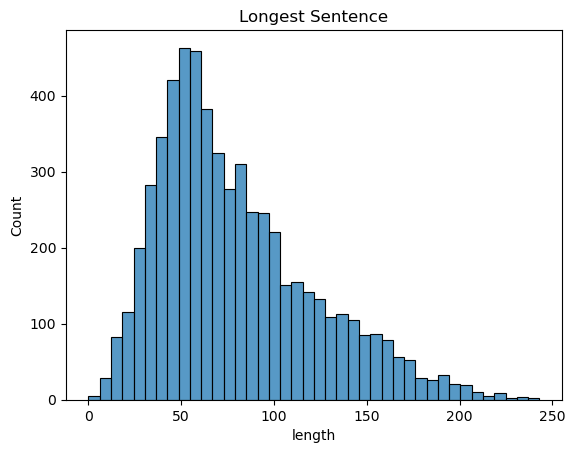

In [9]:
#length of longest sentence for no reason at all
df['length'] = df['Sentence'].apply(len)


sns.histplot(x='length',data=df)
plt.title('Longest Sentence')
plt.show()


In [10]:
#using scoring metrics: accuracy and classification report to evaluate Naive Bayes models and Logistic and Passive Classifiers

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


X = df['Sentence']
X = cv.fit_transform(X).toarray()
y = df['Sentiment']
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

BNB = BernoulliNB()
GNB = GaussianNB()
MNB = MultinomialNB()

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier

lr = LogisticRegression()
PA = PassiveAggressiveClassifier()

from sklearn.metrics import accuracy_score,classification_report

def evaluate_naive_bayes(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Clf_rpt-- {clf_rpt}')
    return pred


BNB_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test,BNB)
GNB_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, GNB)
MNB_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, MNB)
lr_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, PA)


BernoulliNB, --Accuracy-- 70.46%; --Clf_rpt--               precision    recall  f1-score   support

           0       0.23      0.05      0.08       159
           1       0.74      0.88      0.80       666
           2       0.68      0.66      0.67       343

    accuracy                           0.70      1168
   macro avg       0.55      0.53      0.52      1168
weighted avg       0.65      0.70      0.67      1168

GaussianNB, --Accuracy-- 49.14%; --Clf_rpt--               precision    recall  f1-score   support

           0       0.19      0.42      0.26       159
           1       0.74      0.49      0.59       666
           2       0.47      0.52      0.50       343

    accuracy                           0.49      1168
   macro avg       0.47      0.48      0.45      1168
weighted avg       0.58      0.49      0.52      1168

MultinomialNB, --Accuracy-- 68.07%; --Clf_rpt--               precision    recall  f1-score   support

           0       0.32      0.33      0.33 

In [ ]:
#this is trash
